In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['PG','MSFT','F','GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source= 'yahoo', start='1995-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6354 entries, 1995-01-03 to 2020-03-27
Data columns (total 4 columns):
PG      6354 non-null float64
MSFT    6354 non-null float64
F       6354 non-null float64
GE      6354 non-null float64
dtypes: float64(4)
memory usage: 248.2 KB


In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.362402,2.413537,3.200019,2.729230
1995-01-04,6.311406,2.431082,3.286119,2.729230
1995-01-05,6.222151,2.390982,3.257418,2.735919
1995-01-06,6.234900,2.431082,3.257418,2.722540
1995-01-09,6.209402,2.416045,3.314818,2.695783


In [5]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2020-03-23,97.699997,135.979996,4.01,6.11
2020-03-24,103.269997,148.339996,4.95,7.01
2020-03-25,100.919998,146.919998,5.39,7.56
2020-03-26,107.379997,156.110001,5.25,8.12
2020-03-27,110.169998,149.699997,5.19,7.62


# Normalization to 100:
(Pt divided by Po)*100

In [6]:
mydata.iloc[0] # We got the values of the first row of the entire data from the table.

PG      6.362402
MSFT    2.413537
F       3.200019
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

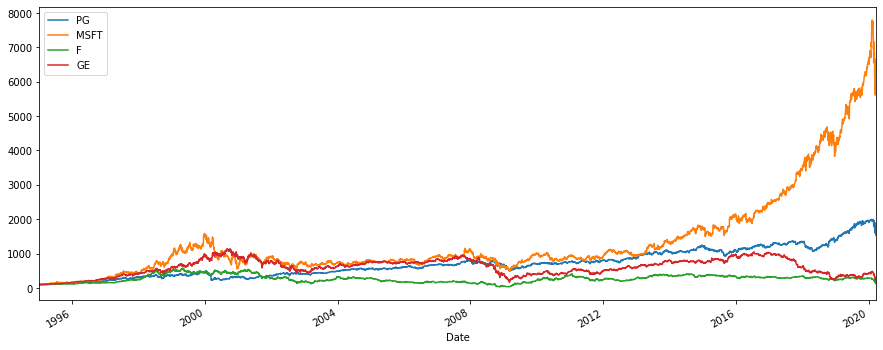

In [7]:
a= (mydata / mydata.iloc[0] * 100).plot(figsize=(15,6)); # We are dividing each row's data with the first row. This is done in order to make sure that the first value all start from a common ground i.e. 100 since anyvalue divided by it's own will give 1 and all stocks originate from the same value, so they can be compared rightly.
plt.show()

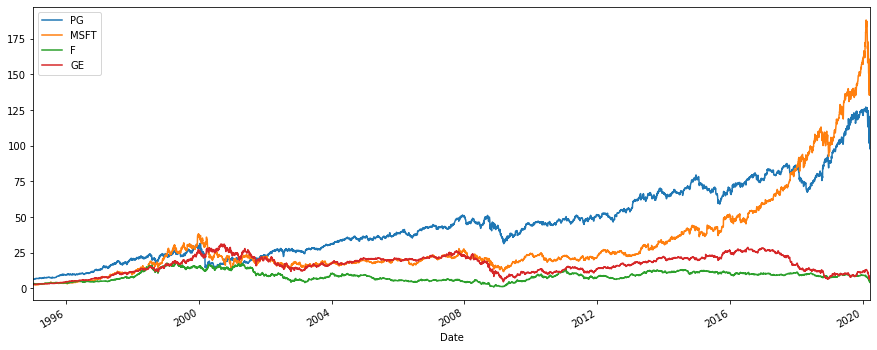

In [8]:
mydata.plot(figsize=(15,6)) # As we can see, the origin is different for the stocks and so they don't have a common point/ground anymore from where they can originate.
plt.show()

In [9]:
mydata.loc['1995-01-03'] # label corresponding to the first row when using loc

PG      6.362402
MSFT    2.413537
F       3.200019
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

In [10]:
mydata.iloc[0] # Leaving the indication of position of interest while using iloc

PG      6.362402
MSFT    2.413537
F       3.200019
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

# Calculating the Return of a portfolio of Securities

In [11]:
returns = (mydata/ mydata.shift(1)) - 1
returns.head # If we are not using () while working with head.

<bound method NDFrame.head of                   PG      MSFT         F        GE
Date                                              
1995-01-03       NaN       NaN       NaN       NaN
1995-01-04 -0.008015  0.007269  0.026906  0.000000
1995-01-05 -0.014142 -0.016495 -0.008734  0.002451
1995-01-06  0.002049  0.016771  0.000000 -0.004890
1995-01-09 -0.004090 -0.006185  0.017621 -0.009828
...              ...       ...       ...       ...
2020-03-23 -0.046178 -0.009975 -0.073903 -0.062883
2020-03-24  0.057011  0.090896  0.234414  0.147300
2020-03-25 -0.022756 -0.009573  0.088889  0.078459
2020-03-26  0.064011  0.062551 -0.025974  0.074074
2020-03-27  0.025983 -0.041061 -0.011429 -0.061576

[6354 rows x 4 columns]>

In [12]:
returns.head() # We get a table when we use ().

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008015,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [13]:
weights = [0.25,0.25,0.25,0.25] # Equally weighted portfolio

In [14]:
np.dot(returns, weights) # Calculates the vector or matrix products

array([        nan,  0.00654002, -0.00923   , ...,  0.03375494,
        0.04366556, -0.02202081])

In [15]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.138043
MSFT    0.212359
F       0.097723
GE      0.088980
dtype: float64

In [16]:
np.dot(annual_returns, weights) # Result of weights with annual_returns

0.13427622752675536

In [17]:
weights_2 = [0.4,0.4,0.15,0.05] # It is not an equally weighted portfolio

In [18]:
np.dot(annual_returns , weights_2) # Result of weights_2 with annual_returns

0.1592681851149741